# Stock Prediction using LSTM Model



### We are considering Google Stock Prices in this project for prediction of stock prices 

**For training we use data set from 2012 - 2016 and for testing we use data set of 2018 - 2019**


### The Algorithms used are:
**Linear Regression**

**LSTM Model - Long Short Term Memory Model (RNN)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 


#for lstm model
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout


In [2]:
google_data = pd.read_csv(r"C:\Users\saiki\Stock Prediction using LSTM\datasetsandcodefilesstockmarketprediction\Google_train_data.csv", encoding = 'latin-1')
google_data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


# Exploratory Data Analysis

In [3]:
google_data.shape

(1258, 6)

In [4]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
google_data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
google_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [7]:
google_data.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [8]:
google_data.sample(5)

,Date,Open,High,Low,Close,Volume
668,8/29/2014,569.77,570.47,565.52,570.03,"1,083,700"
375,7/2/2013,443.44,443.84,437.00,879.89,"3,797,000"
420,9/5/2013,435.12,438.30,434.18,877.15,"2,592,100"
1064,3/29/2016,734.59,747.25,728.76,744.77,"1,903,800"
1125,6/23/2016,697.45,701.95,687.00,701.87,"2,171,400"


In [9]:
google_data.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [10]:
# by using 'to_datetime()'(from pd) we are converting date column into date time format
google_data['Date'] = pd.to_datetime(google_data['Date'], infer_datetime_format=True)

In [11]:
print(f'Dataframe contains stock prices between {google_data.Date.min()} {google_data.Date.max()}') 
print(f'Total days = {(google_data.Date.max()  - google_data.Date.min()).days} days')

Dataframe contains stock prices between 2012-01-03 00:00:00 2016-12-30 00:00:00
Total days = 1823 days


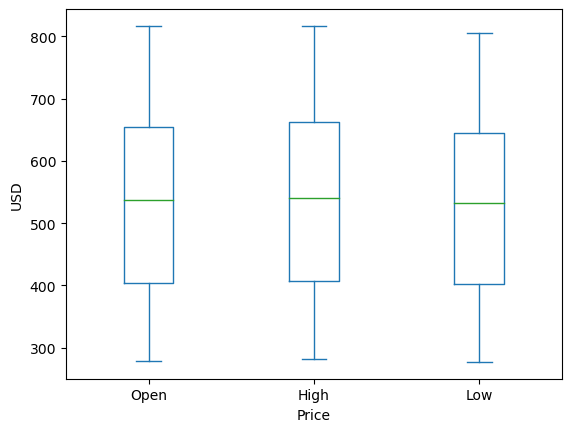

In [12]:
#to check outliers
# import necessary library
import matplotlib.pyplot as plt

# create box plot
google_data[['Open', 'High', 'Low', 'Close']].plot(kind='box')

# add x-axis and y-axis labels
plt.xlabel('Price')
plt.ylabel('USD')

# show the plot
plt.show()


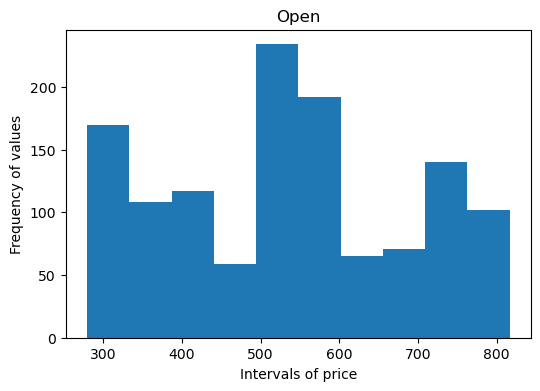

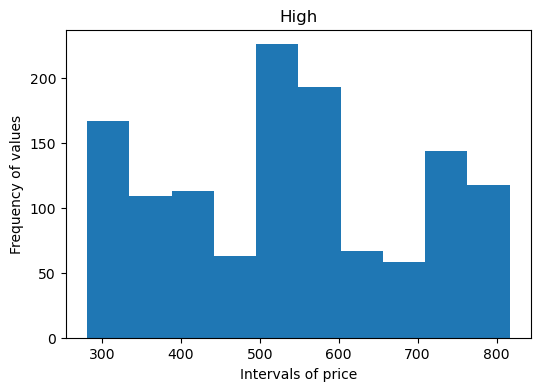

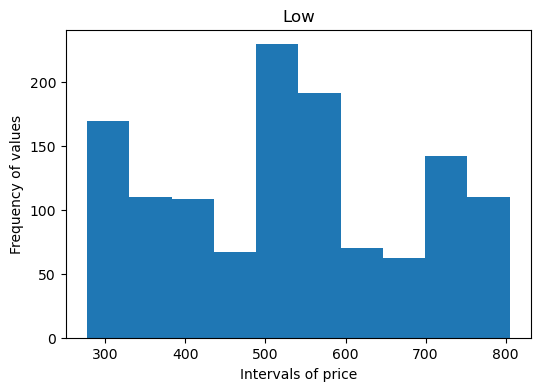

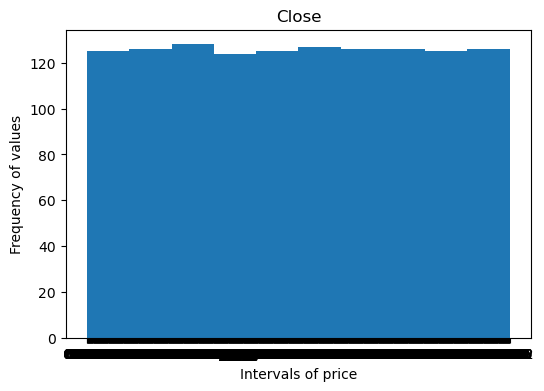

In [13]:
# # create a list of column names to plot
# cols_to_plot = ['Open', 'High', 'Low','Close']

# # loop through the columns and plot a histogram for each one
# for col in cols_to_plot:
#     fig, ax = plt.subplots(figsize=(6, 4))
#     ax.hist(google_data[col], bins=10)
#     ax.set_title(col)
#     plt.show()
    
    

# create a list of column names to plot
cols_to_plot = ['Open', 'High', 'Low', 'Close']

# loop through the columns and plot a histogram for each one
for col in cols_to_plot:
    plt.figure(figsize=(6, 4))
    plt.hist(google_data[col], bins=10)
    plt.title(col)
    plt.xlabel("Intervals of price")
    plt.ylabel("Frequency of values")
    plt.show()



In [14]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Google',
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Courier New, monospace',
            size=20,
            color='#6c03ff'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=20,
            color='#6c03ff'
        )
    )
)

google_data_graph = [{'x':google_data['Date'], 'y':google_data['Open']}]
plot = go.Figure(data=google_data_graph, layout=layout)



#plot(plot) #plotting offline
iplot(plot)

# Building the Linear Regression Model

In [15]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [16]:
#Split the data into train and test sets
X = np.array(google_data.index).reshape(-1,1)
Y = google_data['Open']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [17]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [20]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
google_data_graph = [trace0,trace1]
layout.xaxis.title.text = 'Year'
plot2 = go.Figure(data=google_data_graph, layout=layout)

iplot(plot2)

In [21]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
MSE       1863.2018922703328	1847.4642227503582



# Building LSTM Model

In [22]:
google_data["Close"]=pd.to_numeric(google_data.Close,errors='coerce')
google_data = google_data.dropna()
trainData = google_data.iloc[:,4:5].values

In [23]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

### Training the model with Train Data

In [24]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [25]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [26]:
model = Sequential()
#units 100 default, drop rate 0.2
model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [54]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate =0.001)  # Experiment with different learning rates
model.compile(optimizer=optimizer, loss='mse')
hist = model.fit(X_train, y_train, epochs = 18, batch_size = 32, verbose=2)

Epoch 1/18
35/35 - 7s - loss: 0.0029 - 7s/epoch - 195ms/step
Epoch 2/18
35/35 - 3s - loss: 0.0022 - 3s/epoch - 93ms/step
Epoch 3/18
35/35 - 3s - loss: 0.0022 - 3s/epoch - 88ms/step
Epoch 4/18
35/35 - 3s - loss: 0.0024 - 3s/epoch - 89ms/step
Epoch 5/18
35/35 - 3s - loss: 0.0023 - 3s/epoch - 85ms/step
Epoch 6/18
35/35 - 3s - loss: 0.0026 - 3s/epoch - 86ms/step
Epoch 7/18
35/35 - 3s - loss: 0.0022 - 3s/epoch - 88ms/step
Epoch 8/18
35/35 - 3s - loss: 0.0025 - 3s/epoch - 86ms/step
Epoch 9/18
35/35 - 3s - loss: 0.0022 - 3s/epoch - 88ms/step
Epoch 10/18
35/35 - 3s - loss: 0.0020 - 3s/epoch - 87ms/step
Epoch 11/18
35/35 - 3s - loss: 0.0021 - 3s/epoch - 85ms/step
Epoch 12/18
35/35 - 3s - loss: 0.0023 - 3s/epoch - 87ms/step
Epoch 13/18
35/35 - 3s - loss: 0.0020 - 3s/epoch - 88ms/step
Epoch 14/18
35/35 - 3s - loss: 0.0026 - 3s/epoch - 93ms/step
Epoch 15/18
35/35 - 3s - loss: 0.0029 - 3s/epoch - 85ms/step
Epoch 16/18
35/35 - 3s - loss: 0.0024 - 3s/epoch - 84ms/step
Epoch 17/18
35/35 - 3s - loss: 0

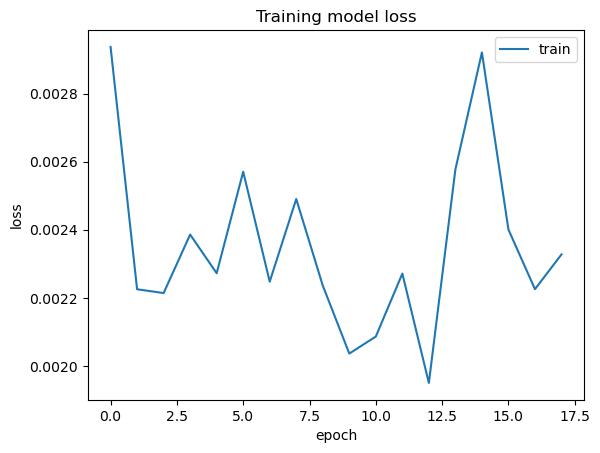

In [55]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

### Testing the model with Test Data

In [56]:
testData = pd.read_csv(r"C:\Users\saiki\Stock Prediction using LSTM\datasetsandcodefilesstockmarketprediction\Google_test_data.csv", encoding = 'latin-1')
#testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-13,1236.979980,1249.272949,1233.640991,1235.010010,1235.010010,997300
1,2018-08-14,1235.189941,1245.869995,1225.109985,1242.099976,1242.099976,1348100
2,2018-08-15,1229.260010,1235.239990,1209.510010,1214.380005,1214.380005,1828800
3,2018-08-16,1224.729980,1226.000000,1202.550049,1206.489990,1206.489990,1343200
4,2018-08-17,1202.030029,1209.020020,1188.239990,1200.959961,1200.959961,1389600
...,...,...,...,...,...,...,...
247,2019-08-07,1156.000000,1178.444946,1149.624023,1173.989990,1173.989990,1444300
248,2019-08-08,1182.829956,1205.010010,1173.020020,1204.800049,1204.800049,1468000
249,2019-08-09,1197.989990,1203.880005,1183.603027,1188.010010,1188.010010,1065700
250,2019-08-12,1179.209961,1184.959961,1167.671997,1174.709961,1174.709961,1003000


In [57]:
# by using 'to_datetime()'(from pd) we are converting date column into date time format
testData['Date'] = pd.to_datetime(testData['Date'], infer_datetime_format=True)


print(f'Dataframe contains test data of stock prices between {testData.Date.min()} {testData.Date.max()}') 
print(f'Total days = {(testData.Date.max()  - testData.Date.min()).days} days')

Dataframe contains test data of stock prices between 2018-08-13 00:00:00 2019-08-13 00:00:00
Total days = 365 days


In [58]:
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 

#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [59]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 1s 27ms/step


array([[1.3077655],
       [1.3314704],
       [1.3744078],
       [1.356327 ],
       [1.3424789],
       [1.3098354],
       [1.3113401],
       [1.3167163],
       [1.3394783],
       [1.3307958],
       [1.2719737],
       [1.2895967],
       [1.2994628],
       [1.2759457],
       [1.309742 ],
       [1.2999784],
       [1.3566378],
       [1.3575459],
       [1.3733444],
       [1.3942828],
       [1.3164034],
       [1.3638141],
       [1.3088596],
       [1.319231 ],
       [1.3279607],
       [1.3386028],
       [1.3333446],
       [1.3069293],
       [1.2743392],
       [1.2924417],
       [1.2776785],
       [1.2556193],
       [1.2090272],
       [1.2022582],
       [1.2776963],
       [1.2818761],
       [1.2752659],
       [1.2800004],
       [1.298409 ],
       [1.2566313],
       [1.3353202],
       [1.328548 ],
       [1.3459117],
       [1.3474226],
       [1.3470947],
       [1.3329151],
       [1.3193969],
       [1.3621101],
       [1.3607926],
       [1.3748051],


In [60]:
predicted_price = sc.inverse_transform(y_pred)

# Final Prediction 

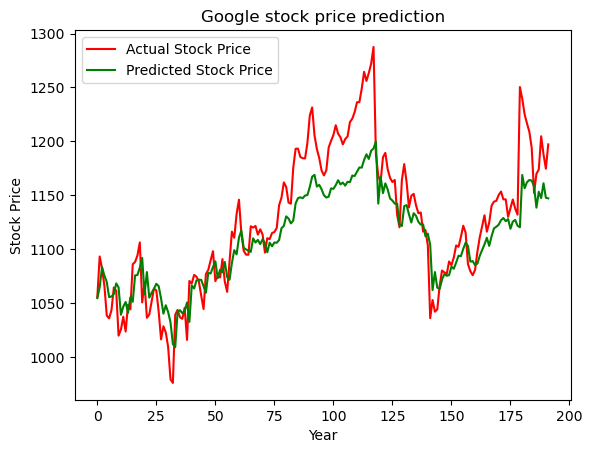

In [61]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
predicted_price = sc.inverse_transform(y_pred)
y_test = y_test.flatten()
predicted_price = predicted_price.flatten()
mse = mean_squared_error(y_test, predicted_price)
print("MSE:", mse)

6/6 [==============================] - 0s 29ms/step
MSE: 1058.03822100997
